# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

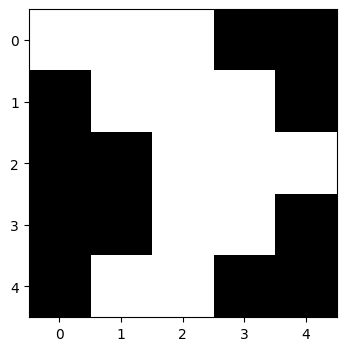

In [ ]:
# Visualizing the input.
plt.imshow(I)

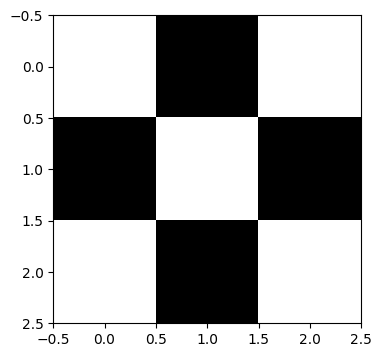

In [ ]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolution(img, filter):
    """
    Function performs convolution operations.

    Arguments:
    img (ndarray): numpy array of an input image.
    filter (ndarray): numpy array of an input filter.

    Returns:
    filter_map (ndarray): Convolved output.
    """
    img_height, img_width = img.shape
    filter_height, filter_width = filter.shape

    # Compute output dimensions using the formula:
    output_height = img_height - filter_height + 1
    output_width = img_width - filter_width + 1

    # Initialize output matrix
    filter_map = np.zeros((output_height, output_width))

    # Perform convolution operation
    for i in range(output_height):
        for j in range(output_width):
            region = img[i:i+filter_height, j:j+filter_width]  # Extract region
            filter_map[i, j] = np.sum(region * filter)  # Apply filter

    return filter_map


In [ ]:
img = convolution(I, K)

In [ ]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


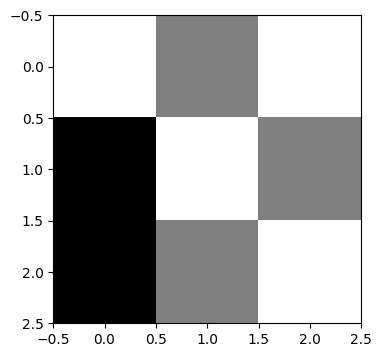

In [ ]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [ ]:
import zipfile
import os

In [ ]:
dataset_zip_path = "/content/drive/MyDrive/ML and AI/week5/FruitinAmazon.zip"

# Directory where the dataset should be extracted
extract_to_path = "/content/drive/MyDrive/ML and AI/week5"



In [ ]:
# Unzipping the dataset
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir = "/content/drive/MyDrive/ML and AI/week5/FruitinAmazon"

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size

  )

Found 120 files belonging to 2 classes.
Using 96 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
  )

Found 120 files belonging to 2 classes.
Using 24 files for validation.


In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['test', 'train']


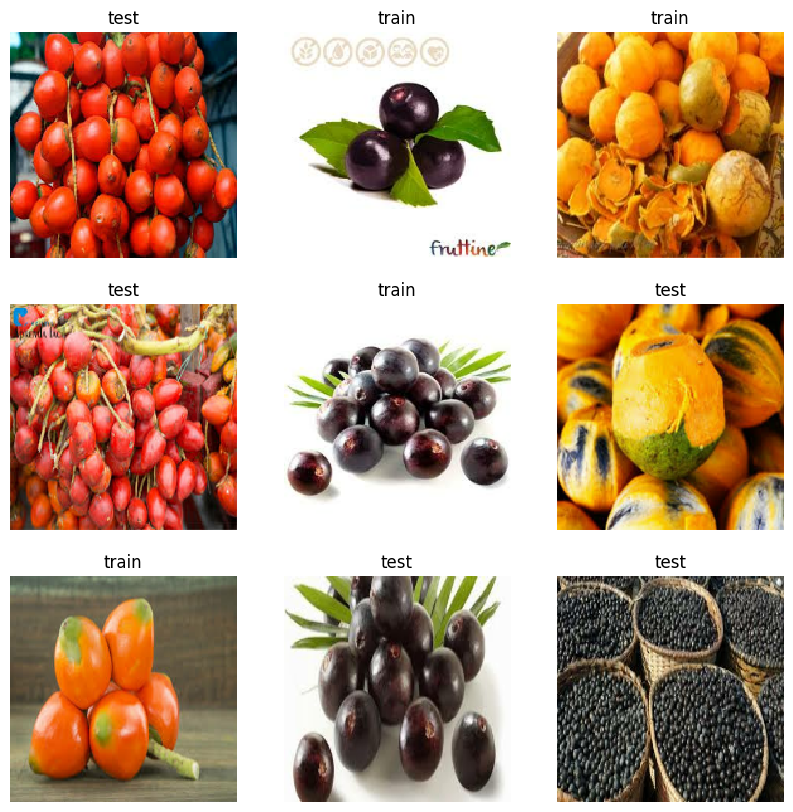

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [ ]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function generates a CNN model with predefined hyperparameters.

    Args:
    image_height (int): Height of an image.
    image_width (int): Width of an image.
    nchannels (int): Number of channels in image.
    num_classes (int): Number of classes in dataset.

    Returns:
    model (tf.keras.Sequential): A CNN model.
    """
    model = Sequential([
        layers.InputLayer(input_shape=(image_height, image_width, nchannels)),  # Specify the input shape here
        layers.Rescaling(1./255),  # Rescaling layer after input

        # First Block: Convolution + Pooling
        layers.Conv2D(16, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D((2,2)),

        # Second Block: Convolution + Pooling
        layers.Conv2D(16, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D((2,2)),

        # Fully connected layers
        layers.Flatten(),
        layers.Dense(128, activation="relu"),

        # Output layer: Number of classes should be 6
        layers.Dense(num_classes)  # Number of classes should be 6
    ])
    return model


img_height = 180
img_width = 180

In [ ]:
num_classes = len(class_names)
model = generate_model(image_height=img_height, image_width=img_width, nchannels=3, num_classes=num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,147,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,150,354 (15.83 MB)

 Trainable params: 4,150,354 (15.83 MB)

 Non-trainable params: 0 (0.00 B)

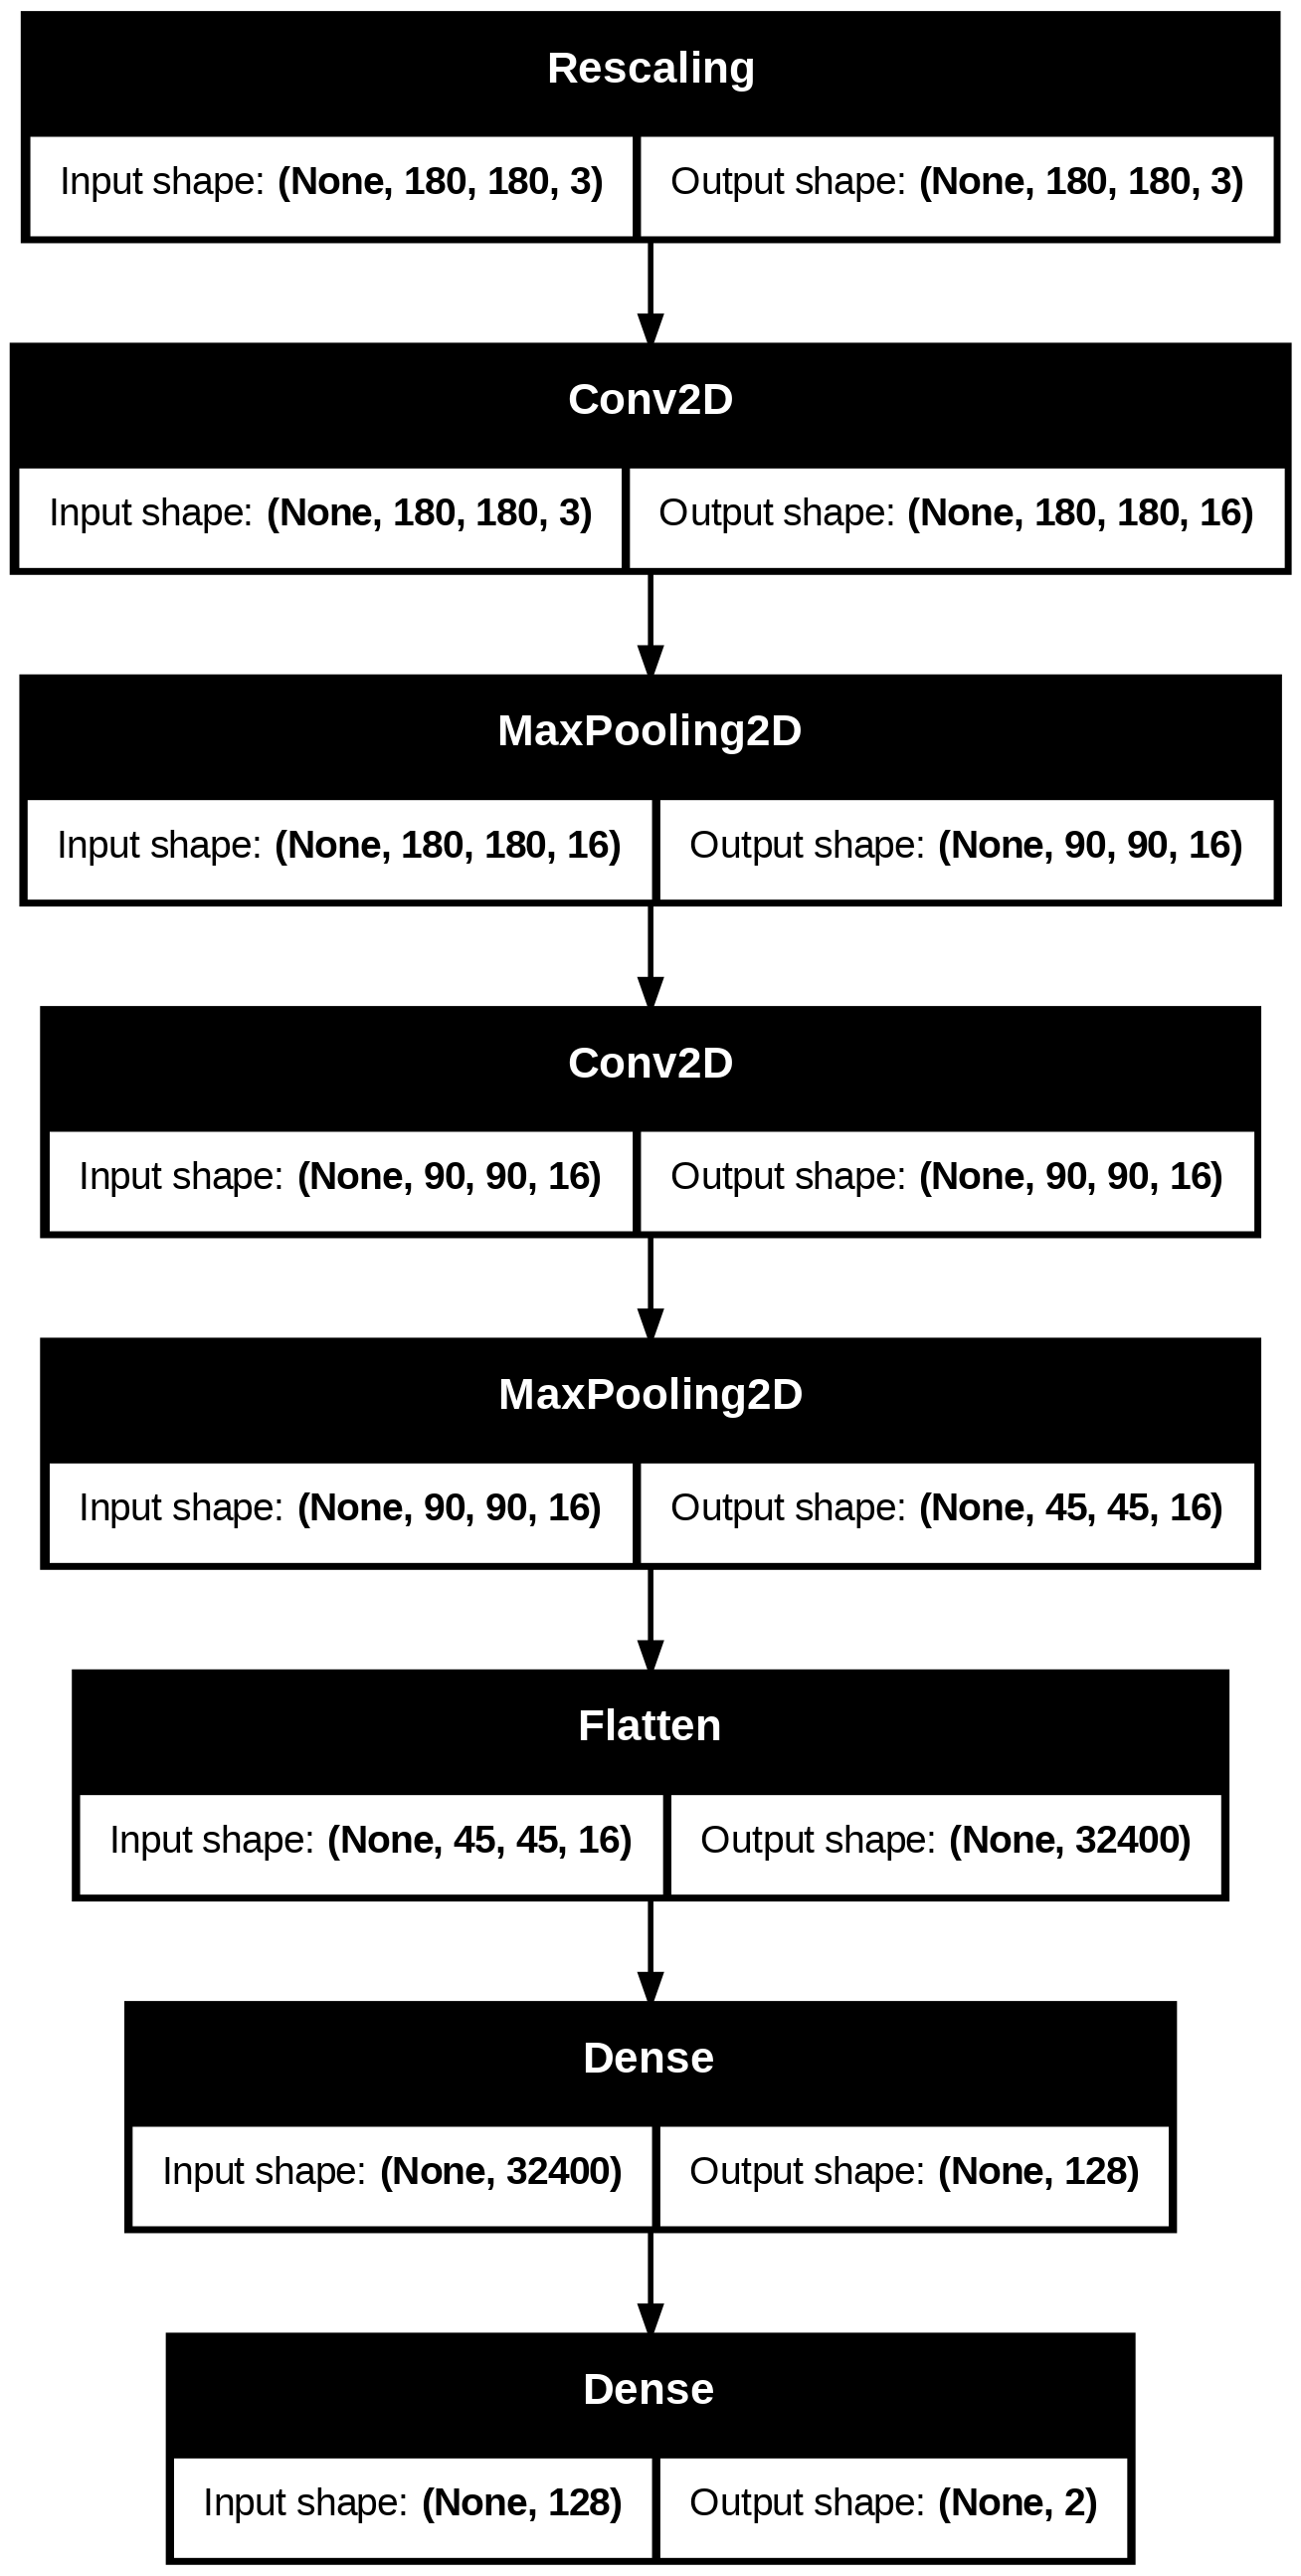

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4167 - loss: 2.5573 - val_accuracy: 0.9167 - val_loss: 0.3904
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 825ms/step - accuracy: 0.5898 - loss: 0.6987 - val_accuracy: 0.9167 - val_loss: 0.4160
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 801ms/step - accuracy: 0.6784 - loss: 0.5766 - val_accuracy: 0.9167 - val_loss: 0.3123
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 772ms/step - accuracy: 0.7214 - loss: 0.5224 - val_accuracy: 0.8750 - val_loss: 0.5716
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 786ms/step - accuracy: 0.9023 - loss: 0.4967 - val_accuracy: 0.9167 - val_loss: 0.3997
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7318 - loss: 0.4610 - val_accuracy: 0.9167 - val_loss: 0.3503
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 762ms/step - accuracy: 0.8177 - loss: 0.4185 - val_accuracy: 0.9167 - val_loss: 0.4327
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 701ms/step - accuracy: 0.9297 - loss: 0.3429 - val_accuracy: 0.9167 - val_loss: 0.371

## Observe the Model Performance.


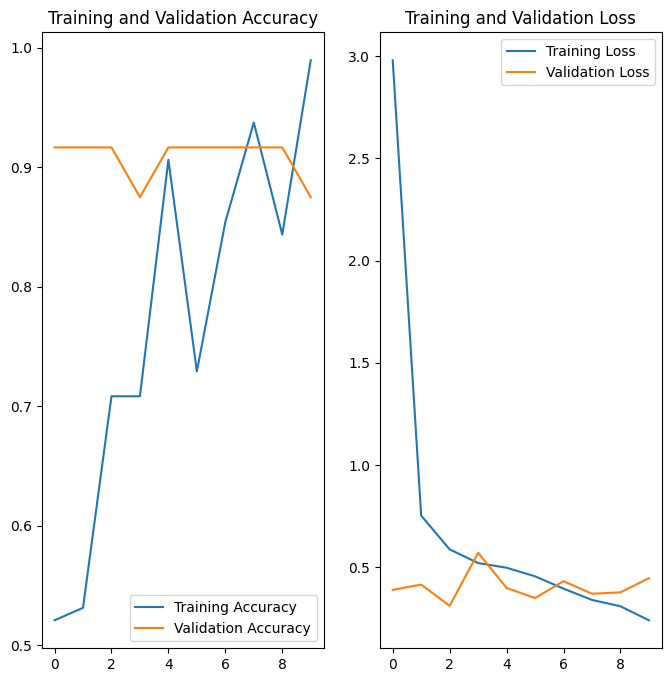

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [ ]:
test_dir = "/content/drive/MyDrive/ML and AI/week5/FruitinAmazon/test"
# Load Test Data
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="int"  # Ensure labels are in integer format
)



Found 30 files belonging to 6 classes.


In [ ]:
import tensorflow as tf

# Load the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/ML and AI/week5/FruitinAmazon/test",
    image_size=(180, 180),
    batch_size=32
)

# Access the class names from the dataset
class_names = test_ds.class_names
print("Class Names:", class_names)

# Check the shape of a batch of images and labels
for image_batch, labels_batch in test_ds.take(1):
    print("Test Image Batch Shape:", image_batch.shape)
    print("Test Labels Batch Shape:", labels_batch.shape)

# Make sure the dataset is ready for evaluation (e.g., caching, prefetching)
test_ds = test_ds.cache().prefetch(tf.data.experimental.AUTOTUNE)

# Define and compile the model (if not already done)
# Example of a simple model, modify as per your architecture
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Rescaling images to [0,1]
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  # 6 classes, softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Found 30 files belonging to 6 classes.
Class Names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']
Test Image Batch Shape: (30, 180, 180, 3)
Test Labels Batch Shape: (30,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step - accuracy: 0.1667 - loss: 1.7983
Test Loss: 1.7982882261276245
Test Accuracy: 0.1666666716337204


In [ ]:
def predict_image(model, img_path):
    """
    Predict the class of a given image using the trained model.

    Args:
    model (tf.keras.Model): Trained CNN model.
    img_path (str): Path to the input image.
    """
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    print(f"Predicted Class: {class_names[predicted_class]}")
    plt.imshow(img)
    plt.title(class_names[predicted_class])
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted Class: graviola


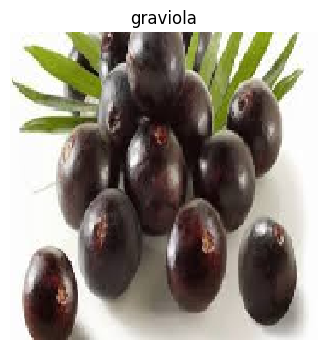

In [ ]:
predict_image(model, "/content/drive/MyDrive/ML and AI/week5/FruitinAmazon/test/acai/images (16).jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: graviola


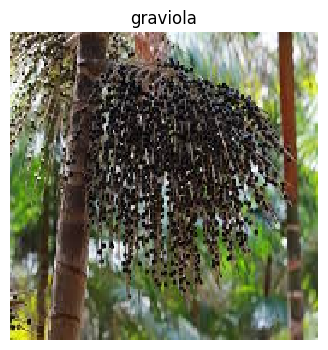

In [ ]:
predict_image(model, "/content/drive/MyDrive/ML and AI/week5/FruitinAmazon/test/acai/images (17).jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Class: graviola


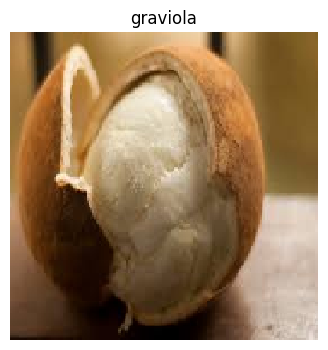

In [ ]:
predict_image(model, "/content/drive/MyDrive/ML and AI/week5/FruitinAmazon/train/cupuacu/images (1).jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Class: graviola


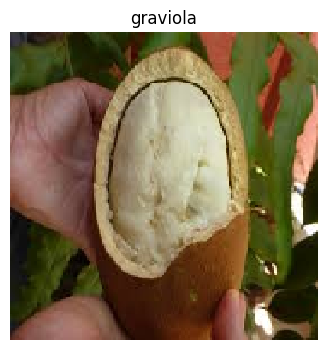

In [ ]:
predict_image(model, "/content/drive/MyDrive/ML and AI/week5/FruitinAmazon/train/cupuacu/images.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Class: graviola


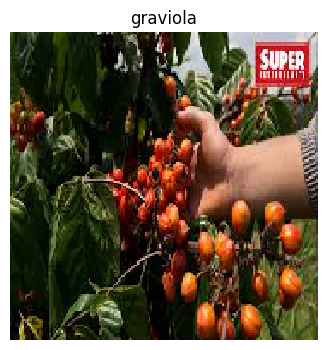

In [ ]:
predict_image(model, "/content/drive/MyDrive/ML and AI/week5/FruitinAmazon/test/guarana/images (4).jpeg")